#<b> Tema: Análisis Predictivo y Diagnóstico Temprano de la Diabetes Tipo 2 </b> </center>
 Integrantes G2:

*   Olalla Luis
*   Paute Kevin
*   Perengueza Brandon
*   Zambrano Jhon





---

#**1. Dataset**

#Exploración de datos

In [ ]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Cargar dataset
dataset = pd.read_csv('/content/sample_data/diabetes_2019.csv')
dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [ ]:
#Caracteristicas del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
#Comprobación del número de filas únicas en cada característica
dataset.nunique().sort_values()

Gender               2
Family_Diabetes      2
highBP               2
Smoking              2
Alcohol              2
UriationFreq         2
Diabetic             3
Pdiabetes            3
RegularMedicine      3
Stress               4
JunkFood             4
Age                  4
PhysicallyActive     4
Pregancies           5
BPLevel              6
Sleep                8
SoundSleep          12
BMI                 26
dtype: int64

In [ ]:
#Estadisticas
dataset.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [ ]:
dataset.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

---

In [ ]:
#Entender la relación entre todas las características.
g = sns.pairplot(dataset)
plt.title('Pairplots para todas las características')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

#Preprocesamiento y manipulacion de datos

In [ ]:
df = dataset.copy()

In [ ]:
# Remover filas
indexes = df[df['Diabetic'].isna() | df['Pdiabetes'].isna() | df['BMI'].isna()].index.to_list()

print(indexes)
df.drop(index= indexes,inplace = True)

[113, 116, 121, 122, 134]


In [ ]:
#imputing pregnancies
print(df['Pregancies'].value_counts())
df['Pregancies'].fillna(value = 0.0, inplace= True)
print(df['Pregancies'].value_counts())
df['Pregancies'] = df['Pregancies'].astype(int)
df['Pregancies']

0.0    750
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64
0.0    792
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    2
Name: Pregancies, Length: 947, dtype: int64

no     681
yes    265
 no      1
Name: Diabetic, dtype: int64
no     682
yes    265
Name: Diabetic, dtype: int64


<Axes: xlabel='Diabetic', ylabel='count'>

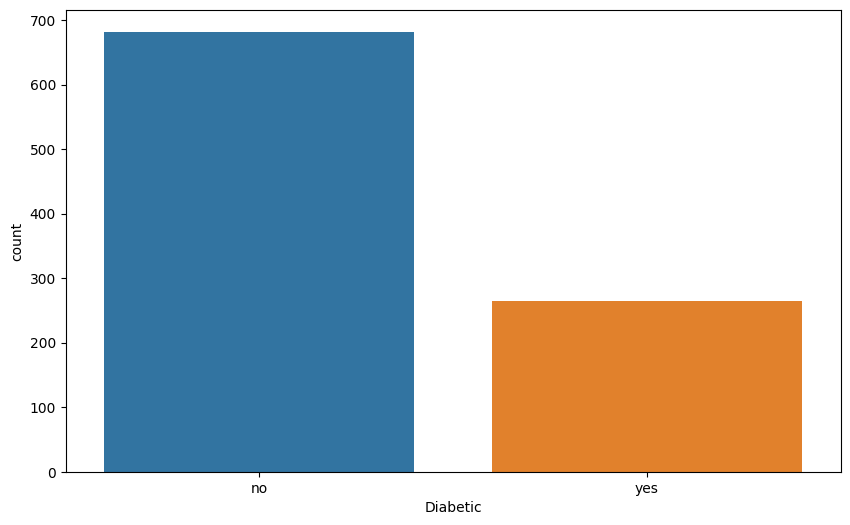

In [ ]:
print(df['Diabetic'].value_counts())
df['Diabetic'].replace(' no', 'no', inplace=True)
print(df['Diabetic'].value_counts())
sns.countplot(x = 'Diabetic',data = df)

In [ ]:
print(df['RegularMedicine'].value_counts())
df['RegularMedicine'].replace('o', 'no', inplace =True)
print(df['RegularMedicine'].value_counts())

no     611
yes    335
o        1
Name: RegularMedicine, dtype: int64
no     612
yes    335
Name: RegularMedicine, dtype: int64


In [ ]:
print(df['Pdiabetes'].value_counts())
df['Pdiabetes'].replace('0', 'no', inplace = True)
print(df['Pdiabetes'].value_counts())

0      932
yes     14
no       1
Name: Pdiabetes, dtype: int64
no     933
yes     14
Name: Pdiabetes, dtype: int64


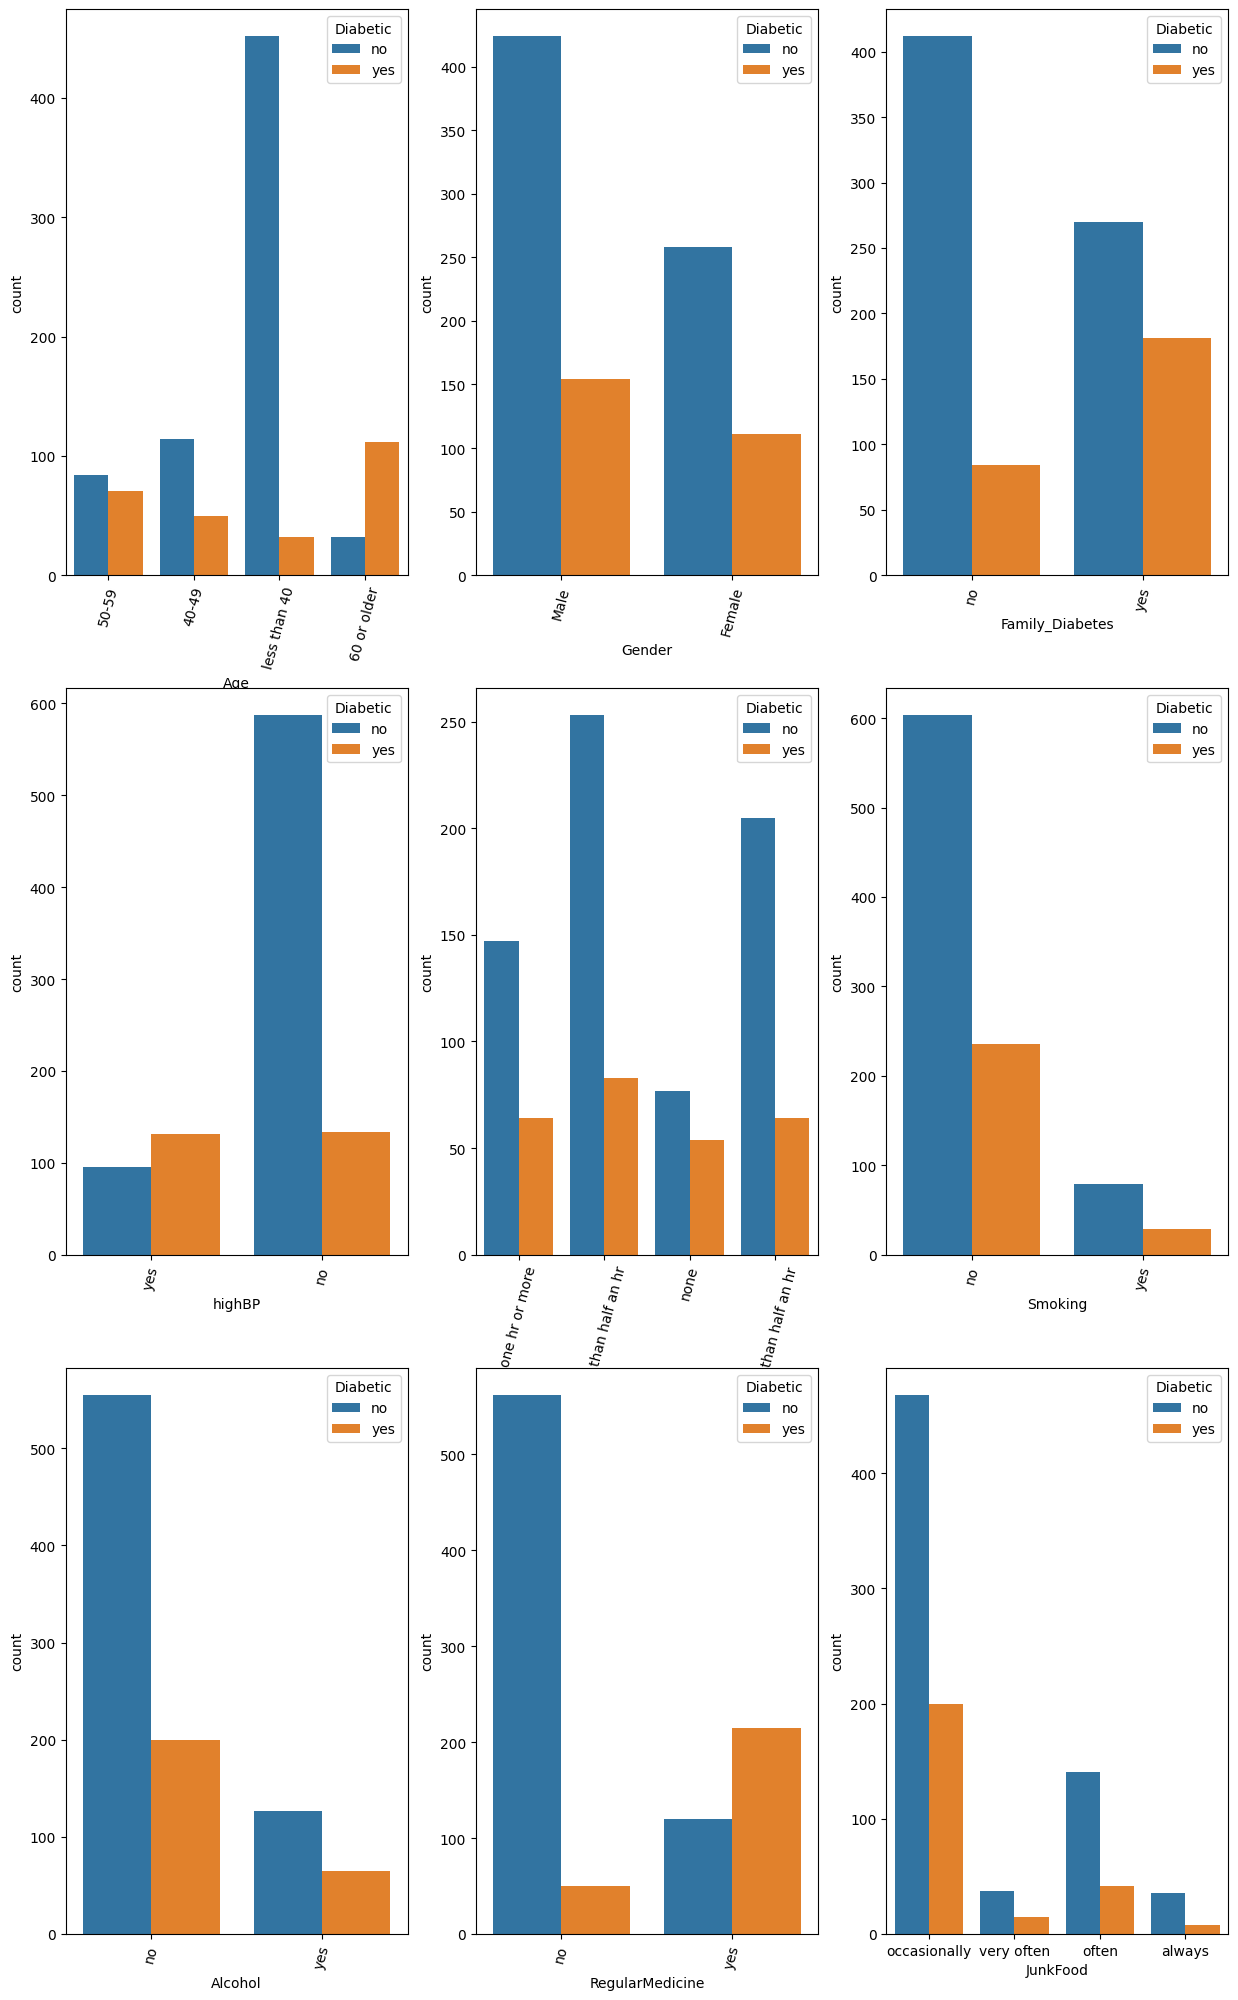

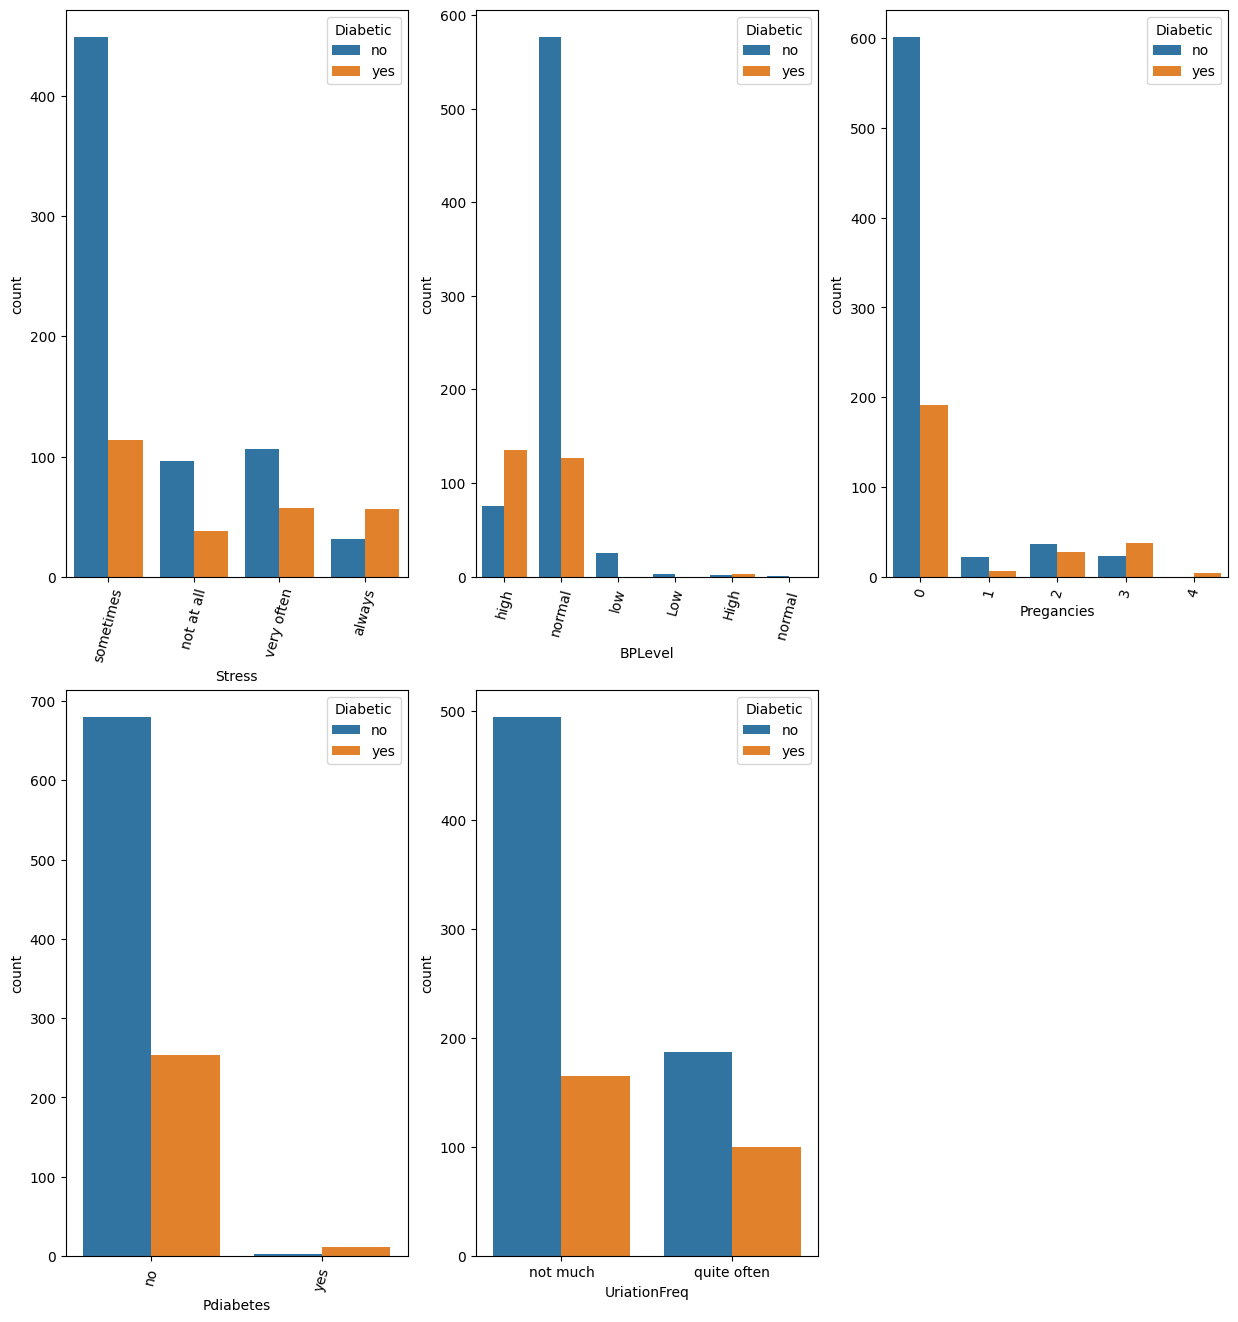

In [ ]:
cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq']

plt.figure(figsize = (15,25))

i  = 0
for j in range(9):
    plt.xticks(rotation=75)
    plt.subplot(int(str(3)+str(3)+str(j+1)))
    sns.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1
plt.show()

plt.figure(figsize = (15,25))
for j in range(5):
    plt.xticks(rotation=75)
    plt.subplot(int(str(3)+str(3)+str(j+1)))
    sns.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1

In [ ]:
#encodig
df = pd.get_dummies(df, drop_first= True)

preg = pd.get_dummies(df['Pregancies'],prefix='Pregnancies',drop_first= True)

print(preg.head())

df = pd.concat([preg,df], axis = 1)
df.drop(columns=['Pregancies'],inplace=True)

   Pregnancies_1  Pregnancies_2  Pregnancies_3  Pregnancies_4
0              0              0              0              0
1              0              0              0              0
2              0              0              0              0
3              0              0              0              0
4              0              0              0              0


In [ ]:
df.columns

Index(['Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4',
       'BMI', 'Sleep', 'SoundSleep', 'Age_50-59', 'Age_60 or older',
       'Age_less than 40', 'Gender_Male', 'Family_Diabetes_yes', 'highBP_yes',
       'PhysicallyActive_more than half an hr', 'PhysicallyActive_none',
       'PhysicallyActive_one hr or more', 'Smoking_yes', 'Alcohol_yes',
       'RegularMedicine_yes', 'JunkFood_occasionally', 'JunkFood_often',
       'JunkFood_very often', 'Stress_not at all', 'Stress_sometimes',
       'Stress_very often', 'BPLevel_Low', 'BPLevel_high', 'BPLevel_low',
       'BPLevel_normal', 'BPLevel_normal ', 'Pdiabetes_yes',
       'UriationFreq_quite often', 'Diabetic_yes'],
      dtype='object')

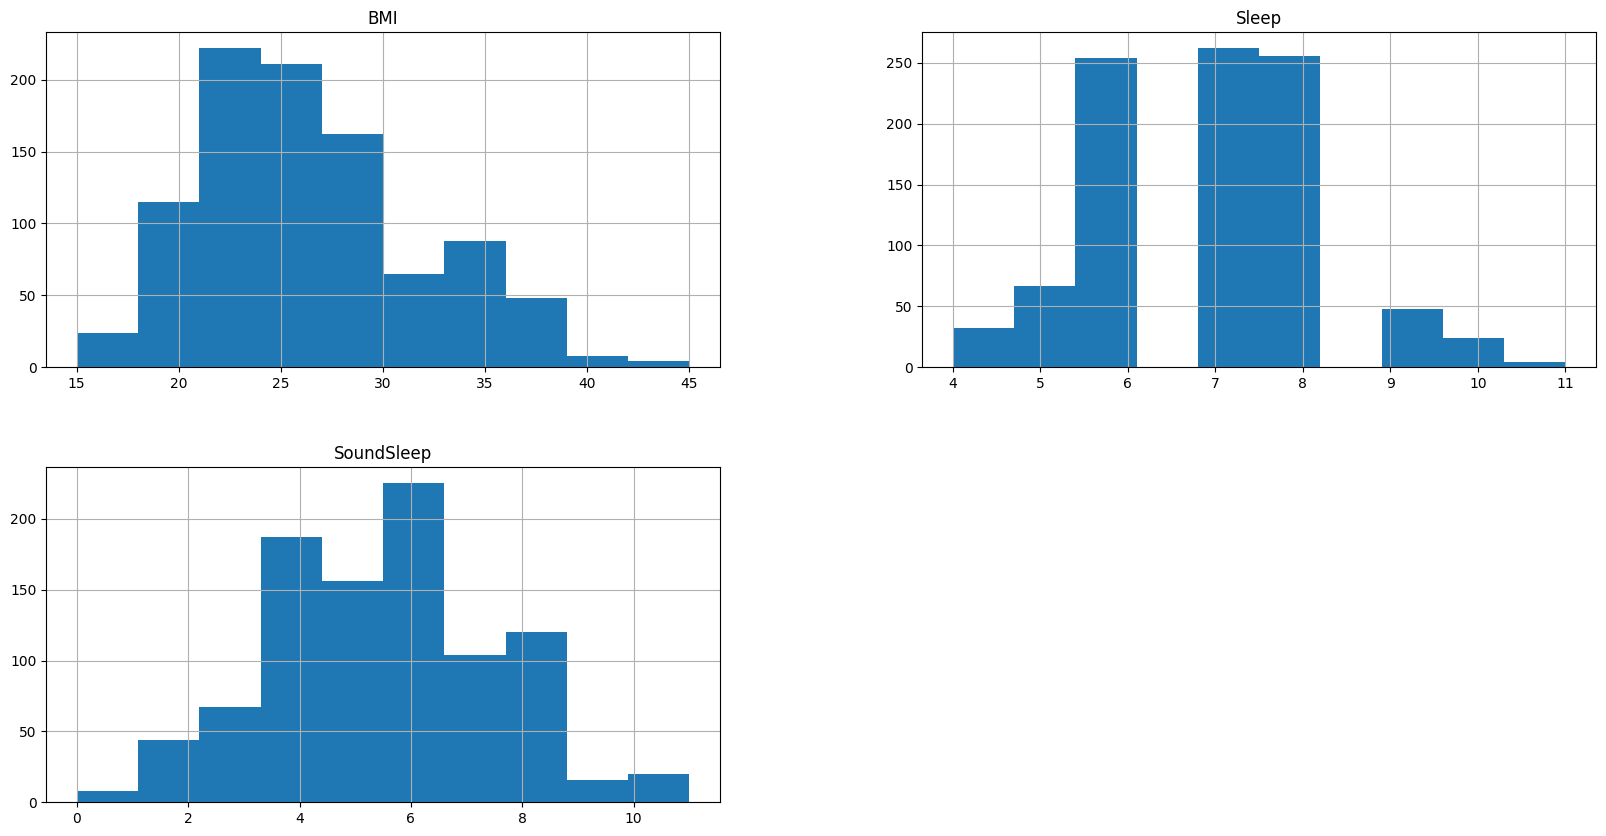

In [ ]:
#Scaling
df[['BMI', 'Sleep','SoundSleep']].hist(figsize=(20,10))
plt.show()

In [ ]:
standard_df = df.copy()

cols = ['BMI','Sleep','SoundSleep']
standard_df[cols] = StandardScaler().fit_transform(standard_df[cols].values)
standard_df

,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,BMI,Sleep,SoundSleep,Age_50-59,Age_60 or older,Age_less than 40,...,Stress_sometimes,Stress_very often,BPLevel_Low,BPLevel_high,BPLevel_low,BPLevel_normal,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often,Diabetic_yes
0,0,0,0,0,2.450335,0.821693,0.268666,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0.413050,0.821693,0.268666,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,-0.327780,-0.748727,0.268666,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,-0.512988,0.821693,0.268666,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0.227843,0.821693,1.339936,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0,0,0,0,-0.142573,0.821693,0.268666,0,0,1,...,1,0,0,0,0,1,0,0,0,1
948,0,0,0,0,0.227843,-0.748727,-0.266969,0,1,0,...,1,0,0,1,0,0,0,0,1,1
949,0,0,0,0,-0.512988,-0.748727,-0.266969,0,1,0,...,1,0,0,1,0,0,0,0,0,0
950,0,0,0,0,0.227843,-0.748727,-0.266969,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# Separar características y etiquetas
y = df['Diabetic_yes']
x = df.drop(columns=['Diabetic_yes'])

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocesamiento con Estandarización
scaler = StandardScaler()
stan_x_train = scaler.fit_transform(x_train)
stan_x_test = scaler.transform(x_test)

 # Visualización de la matriz de confusión
    plt.figure(figsize=(2, 1))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name}')
    plt.show()

# **Evaluación de modelos**

In [ ]:
from sklearn.svm import SVC
# Modelos
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("KNeighbors", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(random_state=42))
]

Metricas para Decision Tree:
Accuracy: 0.9662
Precision: 0.9577
F1 Score: 0.9444


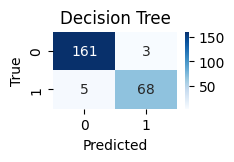

------------------------------
Metricas para KNeighbors:
Accuracy: 0.8692
Precision: 0.8500
F1 Score: 0.7669


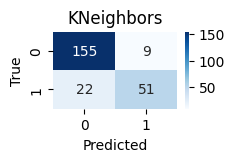

------------------------------
Metricas para Logistic Regression:
Accuracy: 0.8692
Precision: 0.8000
F1 Score: 0.7832


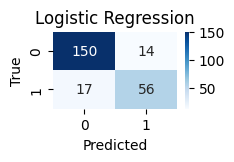

------------------------------
Metricas para Random Forest:
Accuracy: 0.9536
Precision: 0.9306
F1 Score: 0.9241


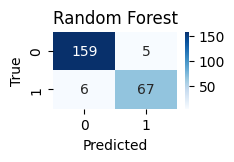

------------------------------
Metricas para SVM:
Accuracy: 0.9198
Precision: 0.8857
F1 Score: 0.8671


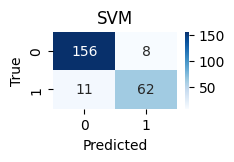

------------------------------


In [ ]:

for model_name, model in models:
    # Entrenamiento
    model.fit(stan_x_train, y_train)

    # Predicción
    y_pred = model.predict(stan_x_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Imprimir métricas
    print(f"Metricas para {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    # Visualización de la matriz de confusión
    plt.figure(figsize=(2, 1))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name}')
    plt.show()
    print("-" * 30)